In [1]:
import app
import pandas as pd
import numpy as np
import pandas_datareader.data as pdr
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from mpl_finance import candlestick_ohlc
import urllib2
import requests

In [3]:
symbols = pd.read_pickle("./data/nasdaq_symbols.pkl")

In [22]:
symbols.head(10)

,Nasdaq Traded,Security Name,Listing Exchange,Market Category,ETF,Round Lot Size,Test Issue,Financial Status,CQS Symbol,NASDAQ Symbol,NextShares
Symbol,,,,,,,,,,,
A,True,"Agilent Technologies, Inc. Common Stock",N,,False,100.0,False,NaN,A,A,False
AA,True,Alcoa Corporation Common Stock,N,,False,100.0,False,NaN,AA,AA,False
AABA,True,Altaba Inc. - Common Stock,Q,Q,False,100.0,False,N,NaN,AABA,False
AAC,True,"AAC Holdings, Inc. Common Stock",N,,False,100.0,False,NaN,AAC,AAC,False
AADR,True,AdvisorShares Dorsey Wright ADR ETF,P,,True,100.0,False,NaN,AADR,AADR,False
AAL,True,"American Airlines Group, Inc. - Common Stock",Q,Q,False,100.0,False,N,NaN,AAL,False
AAMC,True,Altisource Asset Management Corp Com,A,,False,100.0,False,NaN,AAMC,AAMC,False
AAME,True,Atlantic American Corporation - Common Stock,Q,G,False,100.0,False,N,NaN,AAME,False
AAN,True,"Aaron's, Inc. Common Stock",N,,False,100.0,False,NaN,AAN,AAN,False


In [9]:
symbols.columns.values

array(['Nasdaq Traded', 'Security Name', 'Listing Exchange',
       'Market Category', 'ETF', 'Round Lot Size', 'Test Issue',
       'Financial Status', 'CQS Symbol', 'NASDAQ Symbol', 'NextShares'], dtype=object)

In [20]:
LE = symbols[['NASDAQ Symbol','Listing Exchange','ETF']].groupby('ETF').count()
print(LE)

       NASDAQ Symbol  Listing Exchange
ETF                                   
False           6648              6648
True            1957              1957


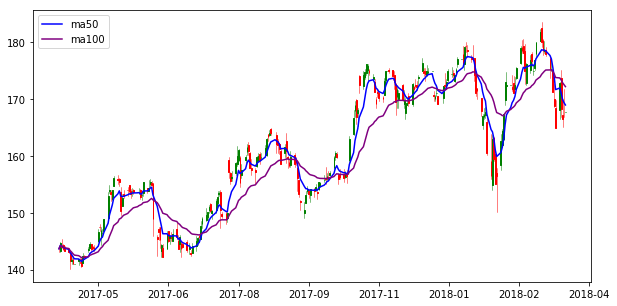

In [87]:
start = datetime.datetime(2017, 4, 1)
end = datetime.datetime(2018, 4, 1)
df = pdr.DataReader('AAPL', 'morningstar', start, end).reset_index()

df['ema50'] = df['Close'].ewm(span=7, adjust=True).mean()
df['ema100'] = df['Close'].ewm(span=28, adjust=True).mean()

df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = mdates.date2num(df['Date'])


ohlc = df[['Date','Open','High','Low','Close']]

f1, ax = plt.subplots(figsize = (10,5))

# plot the candlesticks
candlestick_ohlc(ax, ohlc.values, width=.6, colorup='green', colordown='red')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

ax.plot(df.Date, df['ema50'], color = 'blue', label = 'ma50')
ax.plot(df.Date, df['ema100'], color = 'purple', label = 'ma100')

# other parameters
ax.grid(False)
ax.legend()

plt.show()

In [23]:
URL = 'http://financials.morningstar.com/ajax/exportKR2CSV.html?t=' + 'MMM'
raw = requests.get(URL).content
print(raw)

﻿Growth Profitability and Financial Ratios for 3M Co
Financials
,2008-12,2009-12,2010-12,2011-12,2012-12,2013-12,2014-12,2015-12,2016-12,2017-12,TTM
Revenue USD Mil,"25,269","23,123","26,662","29,611","29,904","30,871","31,821","30,274","30,109","31,657","31,657"
Gross Margin %,47.1,47.6,48.1,47.0,47.5,47.8,48.3,49.2,50.0,49.5,49.5
Operating Income USD Mil,"5,241","4,814","5,918","6,178","6,483","6,666","7,135","6,899","7,112","7,234","7,234"
Operating Margin %,20.7,20.8,22.2,20.9,21.7,21.6,22.4,22.8,23.6,22.9,22.9
Net Income USD Mil,"3,460","3,193","4,085","4,283","4,444","4,659","4,956","4,833","5,050","4,858","4,858"
Earnings Per Share USD,4.89,4.52,5.63,5.96,6.32,6.72,7.49,7.58,8.16,7.93,7.93
Dividends USD,2.00,2.04,2.10,2.20,2.36,2.54,3.42,4.10,4.44,4.70,4.70
Payout Ratio % *,40.9,45.1,37.3,37.0,37.3,38.3,43.9,50.8,54.9,51.7,59.3
Shares Mil,707,707,726,719,703,694,662,637,619,613,613
Book Value Per Share * USD,14.26,17.96,22.00,24.42,25.58,26.83,25.46,19.99,20.11,20.42,19.44
Opera

In [24]:
#remove first line
raw = raw.split('\n',1)[-1]
print(raw)

Financials
,2008-12,2009-12,2010-12,2011-12,2012-12,2013-12,2014-12,2015-12,2016-12,2017-12,TTM
Revenue USD Mil,"25,269","23,123","26,662","29,611","29,904","30,871","31,821","30,274","30,109","31,657","31,657"
Gross Margin %,47.1,47.6,48.1,47.0,47.5,47.8,48.3,49.2,50.0,49.5,49.5
Operating Income USD Mil,"5,241","4,814","5,918","6,178","6,483","6,666","7,135","6,899","7,112","7,234","7,234"
Operating Margin %,20.7,20.8,22.2,20.9,21.7,21.6,22.4,22.8,23.6,22.9,22.9
Net Income USD Mil,"3,460","3,193","4,085","4,283","4,444","4,659","4,956","4,833","5,050","4,858","4,858"
Earnings Per Share USD,4.89,4.52,5.63,5.96,6.32,6.72,7.49,7.58,8.16,7.93,7.93
Dividends USD,2.00,2.04,2.10,2.20,2.36,2.54,3.42,4.10,4.44,4.70,4.70
Payout Ratio % *,40.9,45.1,37.3,37.0,37.3,38.3,43.9,50.8,54.9,51.7,59.3
Shares Mil,707,707,726,719,703,694,662,637,619,613,613
Book Value Per Share * USD,14.26,17.96,22.00,24.42,25.58,26.83,25.46,19.99,20.11,20.42,19.44
Operating Cash Flow USD Mil,"4,533","4,941","5,174","5,284

In [25]:
raw.splitlines()

['Financials',
 ',2008-12,2009-12,2010-12,2011-12,2012-12,2013-12,2014-12,2015-12,2016-12,2017-12,TTM',
 'Revenue USD Mil,"25,269","23,123","26,662","29,611","29,904","30,871","31,821","30,274","30,109","31,657","31,657"',
 'Gross Margin %,47.1,47.6,48.1,47.0,47.5,47.8,48.3,49.2,50.0,49.5,49.5',
 'Operating Income USD Mil,"5,241","4,814","5,918","6,178","6,483","6,666","7,135","6,899","7,112","7,234","7,234"',
 'Operating Margin %,20.7,20.8,22.2,20.9,21.7,21.6,22.4,22.8,23.6,22.9,22.9',
 'Net Income USD Mil,"3,460","3,193","4,085","4,283","4,444","4,659","4,956","4,833","5,050","4,858","4,858"',
 'Earnings Per Share USD,4.89,4.52,5.63,5.96,6.32,6.72,7.49,7.58,8.16,7.93,7.93',
 'Dividends USD,2.00,2.04,2.10,2.20,2.36,2.54,3.42,4.10,4.44,4.70,4.70',
 'Payout Ratio % *,40.9,45.1,37.3,37.0,37.3,38.3,43.9,50.8,54.9,51.7,59.3',
 'Shares Mil,707,707,726,719,703,694,662,637,619,613,613',
 'Book Value Per Share * USD,14.26,17.96,22.00,24.42,25.58,26.83,25.46,19.99,20.11,20.42,19.44',
 'Operatin

In [46]:
URL = 'http://globalquote.morningstar.com/globalcomponent/RealtimeHistoricalStockData.ashx?ticker=XJSE:FSR&showVol=true&dtype=his&f=d&range=2018-1-1|2018-4-7&isD=true&isS=true&hasF=true&ProdCode=DIRECT'
raw = requests.get(URL).content
print(raw)

{"DividendData":[{"Date":"2018-03-27","Desc":"Dividends:1.3000<br>","Type":"Dividend","x":89.47369,"y":0}],"FairValueList":null,"Max":80,"Min":55,"PriceDataList":[{"DailyMaxNumPoint":-1,"Datapoints":[[67,67,67,67],[66.28,67.52,66.25,67.25],[63.3,66.06,63.02,66],[63.16,64.15,62.8,63.4],[63.71,63.85,62.84,63.5],[63.14,64.21,63.09,63.99],[63.39,64.65,62.69,63.21],[63,64.44,61.78,63.65],[61.04,63.26,60.83,62.78],[61.65,61.87,59.95,61.38],[61.5,62.48,61.33,61.65],[63.09,63.39,61.06,61.5],[64.25,64.58,62.57,63.1],[66.1,66.49,64,64],[64.47,66.36,63.83,66.11],[66.5,66.6,64.76,65.4],[69.13,69.13,66.12,66.75],[70.47,72.01,69,69.6],[71.43,71.7,69.9,70.95],[70.25,71.74,69.93,71.3],[67.2,70.22,66.92,69.59],[65.45,66.57,64.61,66.26],[66.5,67.09,65.1,65.1],[66.86,68.16,66.5,66.5],[66.4,67.09,65.35,66.95],[64.51,65.87,64,65.35],[64.59,64.59,61,61.62],[66.94,66.95,64.71,65.5],[66.66,66.93,65.37,66.16],[66.62,67.41,65.11,66.4],[68.91,68.94,66.01,67.54],[70,70.37,68.49,69.04],[70.8,71.79,69.68,70.35],[75

In [33]:
raw

''

In [ ]:
https://quotespeed.morningstar.com/apis/api.jsp?instid=MSSAL&module=chart&symbol=0P0000DLRS&apiVersion=3&premiumUser=false&hideResetIcon=true&cfg=ChartStyle:mountain|intervalType:OneDay|frequency:1&width=477&height=600&fixHeight=false&autoScale=true&showCloseBtn=true&lang=en-ZA&onHeightChange=QSAPI_CB_onHeightChange_QSAPI_IFRAME_1523214776836&onLoad=QSAPI_CB_onLoad_QSAPI_IFRAME_1523214776836&onClose=onCloseCallback&qs_wsid=5E8EBBCD98C89822DE7AD8017D9A4321&wid=QSAPI_IFRAME_1523214776836